In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import matplotlib.dates as mdates
from pycoingecko import CoinGeckoAPI

In [13]:
#Cargamos la data
liquidity = pd.read_csv('csv/gq_all_liquidity_tx.csv')

In [14]:
#Ajustamos los timeStamps
liquidity['timeStamp'] = pd.to_datetime(liquidity['timeStamp'])
liquidity['month'] = liquidity['timeStamp']
liquidity.set_index('timeStamp', inplace=True)

liquidity['month'] = pd.to_datetime(liquidity['month'])
liquidity['month'] = liquidity['month'].dt.strftime('%B')


In [15]:
#Agrupamos por semanas y contamos transacciones
df = liquidity
week_count = df.resample('W').size().reset_index(name='count')

week_count.head()

,timeStamp,count
0,2022-03-06,3376
1,2022-03-13,1570
2,2022-03-20,459
3,2022-03-27,516
4,2022-04-03,1211


In [16]:
balancesum = df['balance'].resample('W').sum()
balancesum = pd.DataFrame(balancesum)

week_tx = week_count.merge(balancesum, left_on='timeStamp', right_index=True, how='left')
week_tx['timeStamp'] = week_tx['timeStamp'].dt.strftime('%b %m %U %Y')
week_tx.head()

,timeStamp,count,balance
0,Mar 03 10 2022,3376,1076723.24
1,Mar 03 11 2022,1570,2573839.68
2,Mar 03 12 2022,459,1888274.06
3,Mar 03 13 2022,516,825466.92
4,Apr 04 14 2022,1211,-4881301.72


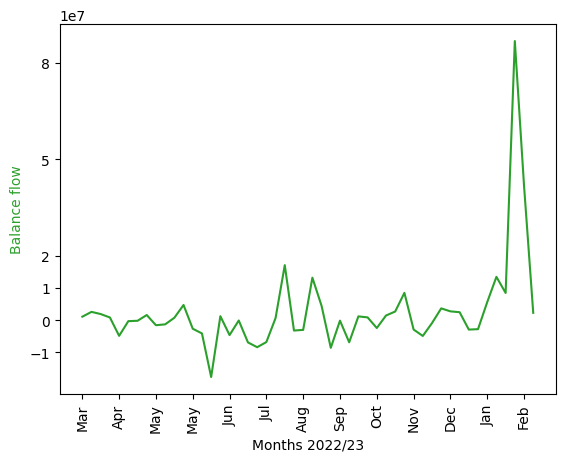

In [18]:
color = 'tab:green'
plt.plot(week_tx['timeStamp'], week_tx['balance'], color=color)

plt.xlabel('Months 2022/23')
plt.ylabel('Balance flow', color=color)
plt.xticks(week_tx['timeStamp'][::4], [x[:3] for x in week_tx['timeStamp'][::4]], rotation=90)
plt.yticks([-10000000, 0, 10000000, 20000000, 50000000, 80000000])
plt.show()

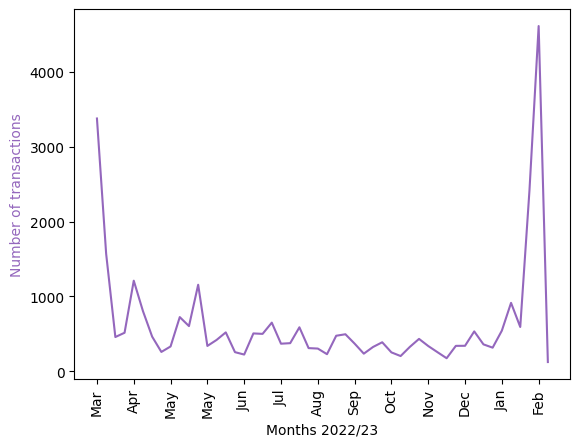

In [19]:
color = 'tab:purple'
plt.plot(week_tx['timeStamp'], week_tx['count'], color=color)

plt.xlabel('Months 2022/23')
plt.ylabel('Number of transactions', color=color)
plt.xticks(week_tx['timeStamp'][::4], [x[:3] for x in week_tx['timeStamp'][::4]], rotation=90)

plt.show()

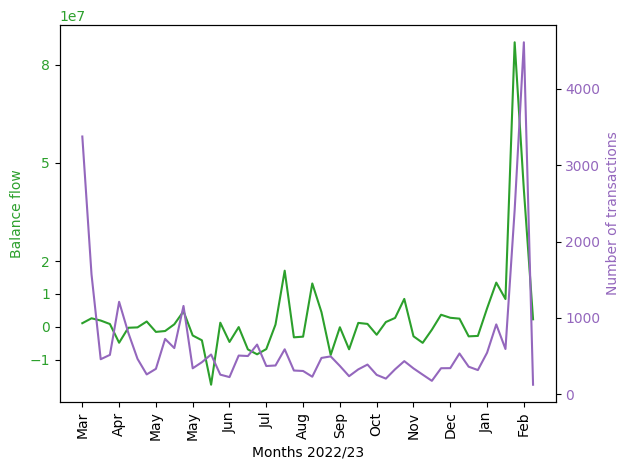

In [474]:
#Tabla con ambas variables
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Months 2022/23')
ax1.set_ylabel('Balance flow', color=color)
ax1.plot(week_tx['timeStamp'], week_tx['balance'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(week_tx['timeStamp'][::4])
ax1.set_xticklabels([x[:3] for x in week_tx['timeStamp'][::4]], rotation=90)
ax1.set_yticks([-10000000, 0, 10000000, 20000000, 50000000, 80000000])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:purple'
ax2.set_ylabel('Number of transactions', color=color)  
ax2.plot(week_tx['timeStamp'], week_tx['count'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()


In [470]:
correlation = np.corrcoef(week_tx['count'], week_tx['balance'])
print("Correlation between timeStamp and balance: {:.4f}\n \n Hay cierta correlacion, por lo que podemos estimar que al aumentar el número de transacciones estas tienen a tener un balance positivo y a haber más compras que ventas".format(correlation[0, 1]))

Correlation between timeStamp and balance: 0.5751
 
 Hay cierta correlacion, por lo que podemos estimar que al aumentar el número de transacciones estas tienen a tener un balance positivo y a haber más compras que ventas


In [693]:
cg = CoinGeckoAPI()

In [696]:
price_data = cg.get_coin_market_chart_by_id(id='outer-ring', vs_currency='usd',  days='max', interval='7d')

In [697]:
price_data = price_data['prices']
data = pd.DataFrame(price_data, columns=['timeStamp', 'price'])
print(data)

         timeStamp     price
0    1646265600000  0.013401
1    1646352000000  0.013401
2    1646438400000  0.015816
3    1646524800000  0.038001
4    1646611200000  0.042216
..             ...       ...
337  1675382400000  0.003211
338  1675468800000  0.003305
339  1675555200000  0.003418
340  1675641600000  0.003983
341  1675723676000  0.004374

[342 rows x 2 columns]


In [698]:
price_data = pd.DataFrame(price_data, columns=['timeStamp', 'price'])
price_data['timeStamp'] = pd.to_datetime(price_data['timeStamp'], unit='ms')
price_data['timeStamp'] = price_data['timeStamp'].dt.strftime('%b %m %U %Y')
price_data


,timeStamp,price
0,Mar 03 09 2022,0.013401
1,Mar 03 09 2022,0.013401
2,Mar 03 09 2022,0.015816
3,Mar 03 10 2022,0.038001
4,Mar 03 10 2022,0.042216
...,...,...
337,Feb 02 05 2023,0.003211
338,Feb 02 05 2023,0.003305
339,Feb 02 06 2023,0.003418
340,Feb 02 06 2023,0.003983


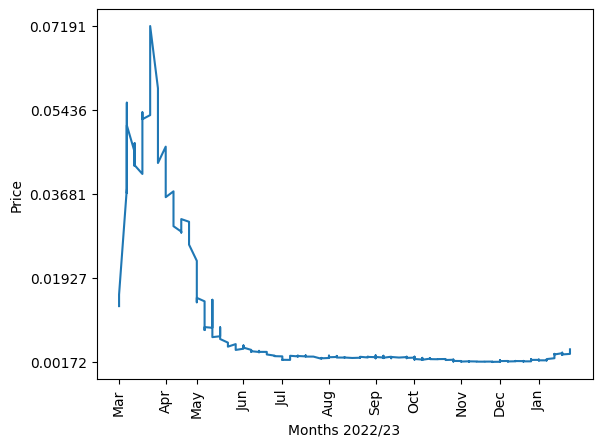

In [699]:
plt.plot(price_data['timeStamp'], price_data['price'])

plt.xlabel('Months 2022/23')
plt.ylabel('Price')


price_data_min = np.min(price_data['price'])
price_data_max = np.max(price_data['price'])
yticks_values = np.linspace(price_data_min, price_data_max, 5)

plt.yticks(yticks_values)
plt.xticks(price_data['timeStamp'][::32], [x[:3] for x in price_data['timeStamp'][::32]], rotation=90)


plt.show()

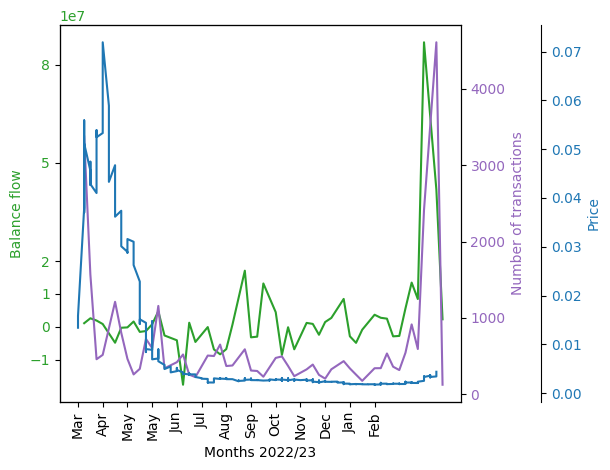

<Figure size 4400x1000 with 0 Axes>

In [705]:
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Months 2022/23')
ax1.set_ylabel('Balance flow', color=color)
ax1.plot(week_tx['timeStamp'], week_tx['balance'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(week_tx['timeStamp'][::4])
ax1.set_xticklabels([x[:3] for x in week_tx['timeStamp'][::4]], rotation=90)
ax1.set_yticks([-10000000, 0, 10000000, 20000000, 50000000, 80000000])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:purple'
ax2.set_ylabel('Number of transactions', color=color)  
ax2.plot(week_tx['timeStamp'], week_tx['count'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()  # instantiate a third axes that shares the same x-axis

color = 'tab:blue'
ax3.set_ylabel('Price', color=color)  
ax3.plot(price_data['timeStamp'], price_data['price'], color=color)
ax3.spines["right"].set_position(("axes", 1.2))
ax3.tick_params(axis='y', labelcolor=color)

plt.figure(figsize=(44, 10))
fig.tight_layout()  
plt.show()
